# Sales Analysis - AAL

### Data Wrangling

In [31]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Check for missing values

In [32]:
# Load data from the csv file
df = pd.read_csv('../data/ausapparalsales4thqrt2020.csv')

# Check missing data
missing_data = df.isna().sum()

# Count rows
row_count = df.shape[0]

# Non-missing data
non_missing_data = df.notna().sum()

print(f'Total Rows: {row_count}\n\nMissing Data:\n{missing_data}\n\nNon-missing Data:\n{non_missing_data}')

Total Rows: 7560

Missing Data:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-missing Data:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


##### The above indicates that there is no missing data.

##### Dropping Null Values
If the percentage of missing values is relatively small and randomly distributed, we can consider dropping rows with missing values un=sing df.dropna().

##### Filling Null Values
If missing values follow a pattern or can be reasonably estimated, we can consider filling them with appropriate values like mean, median, or forward/backward fill. In this case we can use df.fillna().

In [33]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the "Date" column as the index
df.set_index('Date', inplace=True)


C:\Users\fabia\AppData\Local\Temp\ipykernel_16584\278758404.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Numeric columns for normalization
numeric_cols = ['Unit', 'Sales']

# Initializing scaler
scaler = MinMaxScaler()

# Create new columns for normalized data
normalized_cols = [f'{col}_normalized' for col in numeric_cols]

# Normalizing columns
df[normalized_cols] = scaler.fit_transform(df[numeric_cols])

# Showing first few rows of the normalized data
print("Normalized Data:")
print(df.head())


Normalized Data:
                  Time State     Group  Unit  Sales  Unit_normalized  \
Date                                                                   
2020-10-01     Morning    WA      Kids     8  20000         0.095238   
2020-10-01     Morning    WA       Men     8  20000         0.095238   
2020-10-01     Morning    WA     Women     4  10000         0.031746   
2020-10-01     Morning    WA   Seniors    15  37500         0.206349   
2020-10-01   Afternoon    WA      Kids     3   7500         0.015873   

            Sales_normalized  
Date                          
2020-10-01          0.095238  
2020-10-01          0.095238  
2020-10-01          0.031746  
2020-10-01          0.206349  
2020-10-01          0.015873  


#### Grouping
##### Grouping by Sales
##### By State

In [35]:
# Group by State and sum sales
sales_by_state = df.groupby('State')['Sales'].sum()

print("Total Sales by State:")
print(sales_by_state)


Total Sales by State:
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


##### By Group

In [36]:
# Group by Group and sum sales
sales_by_group = df.groupby('Group')['Sales'].sum()

print("\nTotal Sales by Group:")
print(sales_by_group)



Total Sales by Group:
Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


##### By Unit and Sales
##### By State

In [37]:
# Group by State and sum units and sales
unit_sales_by_state = df.groupby('State')[['Unit', 'Sales']].sum()

print("\nTotal Units and Sales by State:")
print(unit_sales_by_state)



Total Units and Sales by State:
        Unit      Sales
State                  
NSW    29988   74970000
NT      9032   22580000
QLD    13367   33417500
SA     23543   58857500
TAS     9104   22760000
VIC    42226  105565000
WA      8861   22152500


##### By Group

In [38]:
# Group by Group and sum units and sales
unit_sales_by_group = df.groupby('Group')[['Unit', 'Sales']].sum()

print("\nTotal Units and Sales by Group:")
print(unit_sales_by_group)



Total Units and Sales by Group:
          Unit     Sales
Group                   
Kids     34029  85072500
Men      34300  85750000
Seniors  33615  84037500
Women    34177  85442500


### Descriptive Statistical Analysis: Sales and Unit Columns

In [39]:
# Descriptive statistical analysis on 'Sales' and 'Unit' columns
sales_stats = df['Sales'].describe()
unit_stats = df['Unit'].describe()

# Median and mode for 'Sales'
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode().iloc[0]

# Median and mode for 'Unit'
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode().iloc[0]

# Standard deviation for 'Sales' and 'Unit'
sales_std_dev = df['Sales'].std()
unit_std_dev = df['Unit'].std()

# Display results
print("Descriptive Statistics for 'Sales':")
print(sales_stats)
print("\nMedian for 'Sales':", sales_median)
print("Mode for 'Sales':", sales_mode)
print("Standard Deviation for 'Sales':", sales_std_dev)

print("\n---------------------------------\n")

print("Descriptive Statistics for 'Unit':")
print(unit_stats)
print("\nMedian for 'Unit':", unit_median)
print("Mode for 'Unit':", unit_mode)
print("Standard Deviation for 'Unit':", unit_std_dev)


Descriptive Statistics for 'Sales':
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Median for 'Sales': 35000.0
Mode for 'Sales': 22500
Standard Deviation for 'Sales': 32253.506943966073

---------------------------------

Descriptive Statistics for 'Unit':
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

Median for 'Unit': 14.0
Mode for 'Unit': 9
Standard Deviation for 'Unit': 12.90140277758643


##### Highest and Lowest sales by Group

In [40]:
# Determine which group is generating the highest sales
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()

# Determine which group is generating the lowest sales
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()

# Show results
print(f'Group generating the highest sales: {highest_sales_group}')
print(f'Group generating the lowest sales: {lowest_sales_group}')

# groupby() is used to group the data by "Group". Calculating the sum for each group using sum()
# idxmax() - to get the group with max sales
# idxmin() - to get the group with min sales

Group generating the highest sales:  Men
Group generating the lowest sales:  Seniors


##### Highest and Lowest sales by State

In [41]:
# Determine which state is generating the highest sales
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()

# Determine which state is generating the lowest sales
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()

# Display the results using f-strings
print(f"State generating the highest sales: {highest_sales_state}")
print(f"State generating the lowest sales: {lowest_sales_state}")

# Same logic as previous (Group), but with the state column.

State generating the highest sales:  VIC
State generating the lowest sales:  WA


### Weekly, monthly and quarterly reports

I used the resample method in pandas. This method allows us to group time-series data based on different frequencies.

References:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

##### Weekly Report

In [47]:
# Resample the data to weekly and sum the values
weekly_report = df.resample('W').agg({
    'Unit': 'sum',
    'Sales': 'sum'
})

# Column with the start date of each week - to make the report more readable
weekly_report['week_of'] = weekly_report.index.to_period('W').start_time

# Reorder columns to make 'week_of' the first column
weekly_report = weekly_report[['week_of', 'Unit', 'Sales']]

# Display report
print("Weekly Report")
print(weekly_report)


Weekly Report
              week_of   Unit     Sales
Date                                  
2020-10-04 2020-09-28   6018  15045000
2020-10-11 2020-10-05  10801  27002500
2020-10-18 2020-10-12  10656  26640000
2020-10-25 2020-10-19  10726  26815000
2020-11-01 2020-10-26   8723  21807500
2020-11-08 2020-11-02   8346  20865000
2020-11-15 2020-11-09   8469  21172500
2020-11-22 2020-11-16   8445  21112500
2020-11-29 2020-11-23   8591  21477500
2020-12-06 2020-11-30  11849  29622500
2020-12-13 2020-12-07  12610  31525000
2020-12-20 2020-12-14  12662  31655000
2020-12-27 2020-12-21  12708  31770000
2021-01-03 2020-12-28   5517  13792500


##### Weekly Report (Unit, Sales, Group)

In [52]:
# Resample the data to weekly and sum the values
weekly_report_group = df.groupby(['Group', df.index.to_period('W').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("Weekly Report with Details for Group:")
print(weekly_report_group)


Weekly Report with Details for Group:
       Group       Date  Unit    Sales
0       Kids 2020-09-28  1476  3690000
1       Kids 2020-10-05  2808  7020000
2       Kids 2020-10-12  2683  6707500
3       Kids 2020-10-19  2610  6525000
4       Kids 2020-10-26  2196  5490000
5       Kids 2020-11-02  2050  5125000
6       Kids 2020-11-09  2126  5315000
7       Kids 2020-11-16  2121  5302500
8       Kids 2020-11-23  2231  5577500
9       Kids 2020-11-30  2945  7362500
10      Kids 2020-12-07  3212  8030000
11      Kids 2020-12-14  3106  7765000
12      Kids 2020-12-21  3052  7630000
13      Kids 2020-12-28  1413  3532500
14       Men 2020-09-28  1492  3730000
15       Men 2020-10-05  2723  6807500
16       Men 2020-10-12  2684  6710000
17       Men 2020-10-19  2749  6872500
18       Men 2020-10-26  2203  5507500
19       Men 2020-11-02  2134  5335000
20       Men 2020-11-09  2097  5242500
21       Men 2020-11-16  2010  5025000
22       Men 2020-11-23  2193  5482500
23       Men 2020-11-30  3

##### Weekly Report (Unit, Sales, State)

In [51]:
# Resample the data to weekly and sum the values
weekly_report_state = df.groupby(['State', df.index.to_period('W').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("\nWeekly Report with Details for State:")
print(weekly_report_state)



Weekly Report with Details for State:
   State       Date  Unit    Sales
0    NSW 2020-09-28  1353  3382500
1    NSW 2020-10-05  2357  5892500
2    NSW 2020-10-12  2287  5717500
3    NSW 2020-10-19  2369  5922500
4    NSW 2020-10-26  1929  4822500
..   ...        ...   ...      ...
93    WA 2020-11-30   824  2060000
94    WA 2020-12-07   858  2145000
95    WA 2020-12-14   802  2005000
96    WA 2020-12-21   837  2092500
97    WA 2020-12-28   370   925000

[98 rows x 4 columns]


##### Monthly Report

In [49]:
# Resample the data to monthly and sum the values
monthly_report = df.resample('ME').agg({
    'Unit': 'sum',
    'Sales': 'sum'
})

# Column with the month name - to make the report more readable
monthly_report['month_name'] = monthly_report.index.strftime('%B')

# Reorder columns to make 'month_name' the first column
monthly_report = monthly_report[['month_name', 'Unit', 'Sales']]

# Display report
print("Monthly Report")
print(monthly_report)


Monthly Report
           month_name   Unit      Sales
Date                                   
2020-10-31    October  45716  114290000
2020-11-30   November  36273   90682500
2020-12-31   December  54132  135330000


##### Monthly Report (Unit, Sales, Group)

In [54]:
# Resample the data to monthly and sum the values with details for each group
monthly_report_group = df.groupby(['Group', df.index.to_period('M').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("Monthly Report with Details for Group:")
print(monthly_report_group)


Monthly Report with Details for Group:
       Group       Date   Unit     Sales
0       Kids 2020-10-01  11454  28635000
1       Kids 2020-11-01   9153  22882500
2       Kids 2020-12-01  13422  33555000
3        Men 2020-10-01  11554  28885000
4        Men 2020-11-01   9046  22615000
5        Men 2020-12-01  13700  34250000
6    Seniors 2020-10-01  11426  28565000
7    Seniors 2020-11-01   8929  22322500
8    Seniors 2020-12-01  13260  33150000
9      Women 2020-10-01  11282  28205000
10     Women 2020-11-01   9145  22862500
11     Women 2020-12-01  13750  34375000


##### Monthly Report (Unit, Sales, State)

In [55]:
# Resample the data to monthly and sum the values with details for each state
monthly_report_state = df.groupby(['State', df.index.to_period('M').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("Monthly Report with Details for State:")
print(monthly_report_state)


Monthly Report with Details for State:
   State       Date   Unit     Sales
0    NSW 2020-10-01  10003  25007500
1    NSW 2020-11-01   8596  21490000
2    NSW 2020-12-01  11389  28472500
3     NT 2020-10-01   3289   8222500
4     NT 2020-11-01   2103   5257500
5     NT 2020-12-01   3640   9100000
6    QLD 2020-10-01   4448  11120000
7    QLD 2020-11-01   3244   8110000
8    QLD 2020-12-01   5675  14187500
9     SA 2020-10-01   8244  20610000
10    SA 2020-11-01   6213  15532500
11    SA 2020-12-01   9086  22715000
12   TAS 2020-10-01   3206   8015000
13   TAS 2020-11-01   2218   5545000
14   TAS 2020-12-01   3680   9200000
15   VIC 2020-10-01  13377  33442500
16   VIC 2020-11-01  11812  29530000
17   VIC 2020-12-01  17037  42592500
18    WA 2020-10-01   3149   7872500
19    WA 2020-11-01   2087   5217500
20    WA 2020-12-01   3625   9062500


##### Quarterly Report (Unit, Sales, Group)

In [56]:
# Resample the data to quarterly and sum the values with details for each group
quarterly_report_group = df.groupby(['Group', df.index.to_period('Q').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("Quarterly Report with Details for Group:")
print(quarterly_report_group)


Quarterly Report with Details for Group:
      Group       Date   Unit     Sales
0      Kids 2020-10-01  34029  85072500
1       Men 2020-10-01  34300  85750000
2   Seniors 2020-10-01  33615  84037500
3     Women 2020-10-01  34177  85442500


##### Quarterly Report (Unit, Sales, State)

In [57]:
# Resample the data to quarterly and sum the values with details for each state
quarterly_report_state = df.groupby(['State', df.index.to_period('Q').start_time]).agg({
    'Unit': 'sum',
    'Sales': 'sum'
}).reset_index()

print("\nQuarterly Report with Details for State:")
print(quarterly_report_state)



Quarterly Report with Details for State:
  State       Date   Unit      Sales
0   NSW 2020-10-01  29988   74970000
1    NT 2020-10-01   9032   22580000
2   QLD 2020-10-01  13367   33417500
3    SA 2020-10-01  23543   58857500
4   TAS 2020-10-01   9104   22760000
5   VIC 2020-10-01  42226  105565000
6    WA 2020-10-01   8861   22152500


### Data Visualization Dashboard

##### State-wise sales analysis for different groups

C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

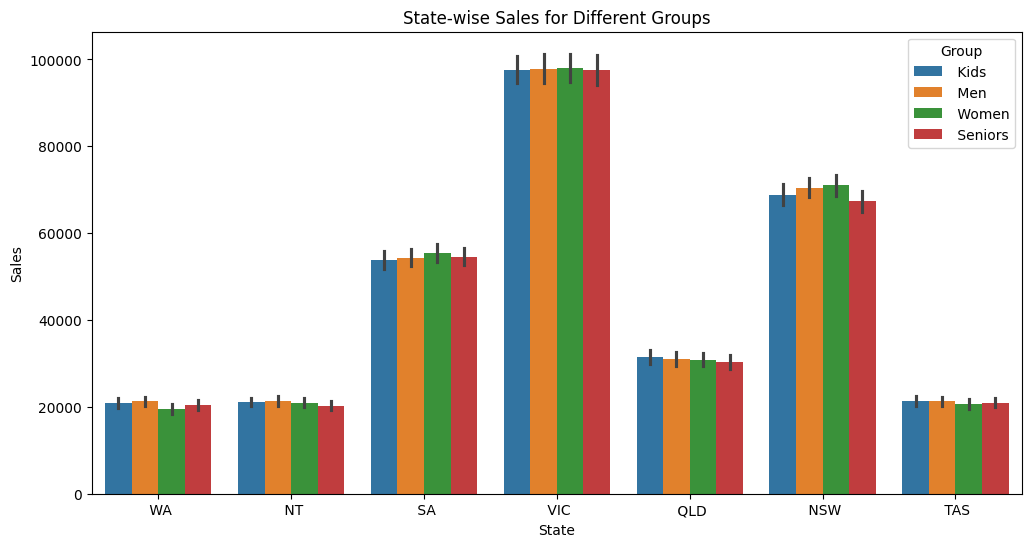

In [62]:
# Libraries already imported above
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=df, hue='Group')
plt.title('State-wise Sales for Different Groups')
plt.show()

C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

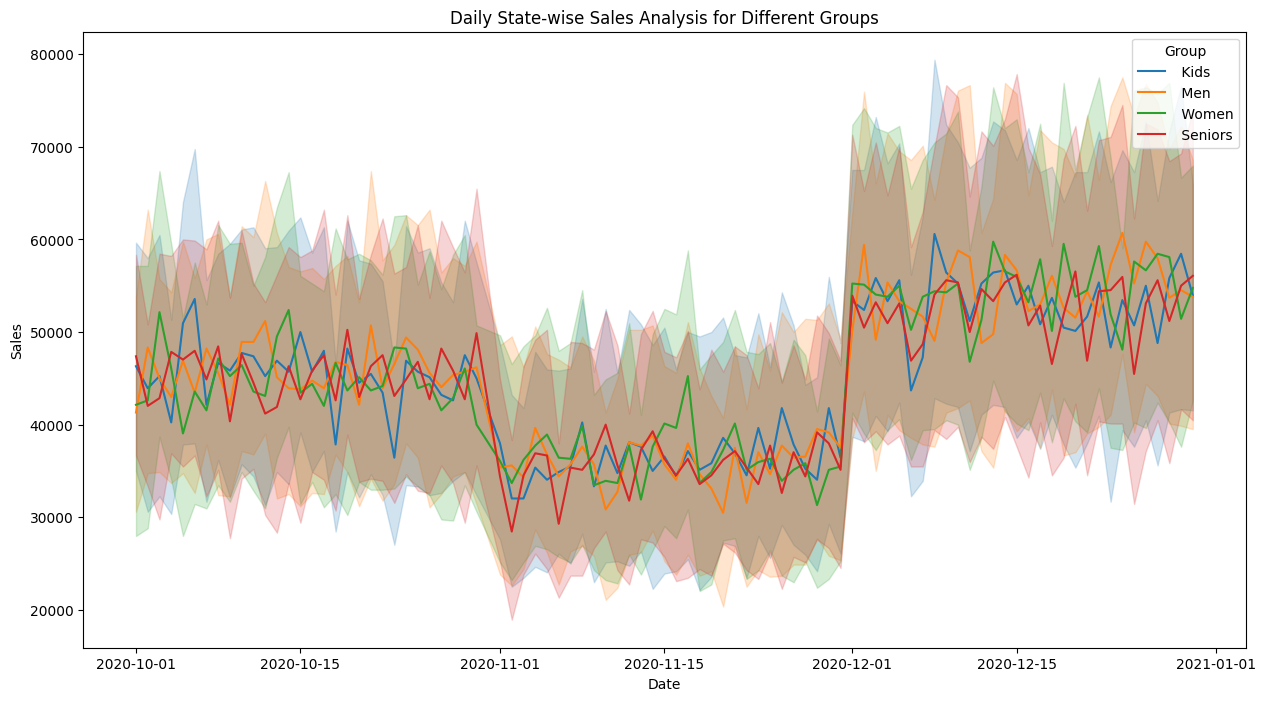

In [67]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Sales', hue='Group', data=df)
plt.title('Daily State-wise Sales Analysis for Different Groups')
plt.show()

##### Group-wise sales analysis across different states

C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

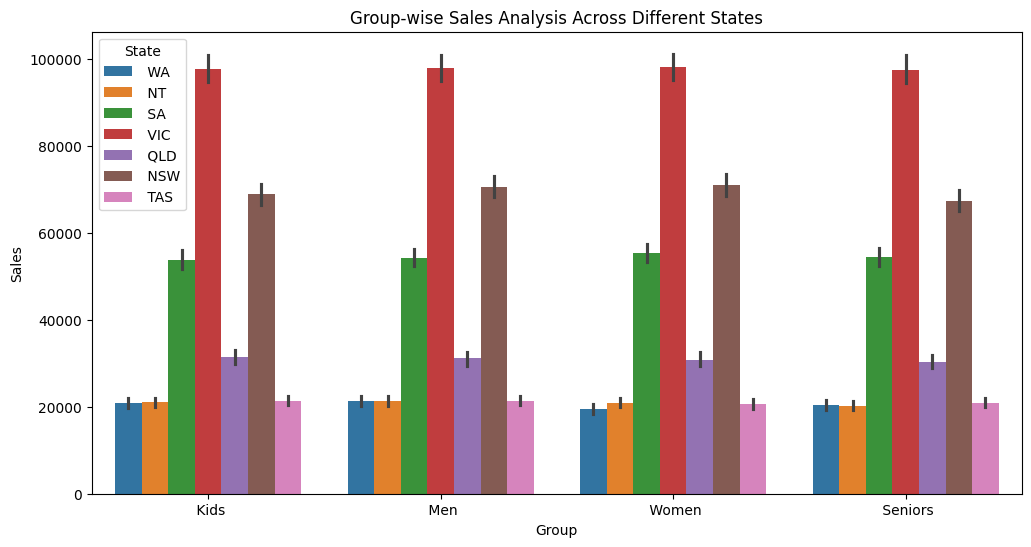

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', data=df, hue='State')
plt.title('Group-wise Sales Analysis Across Different States')
plt.show()

##### Time-of-day Analysis

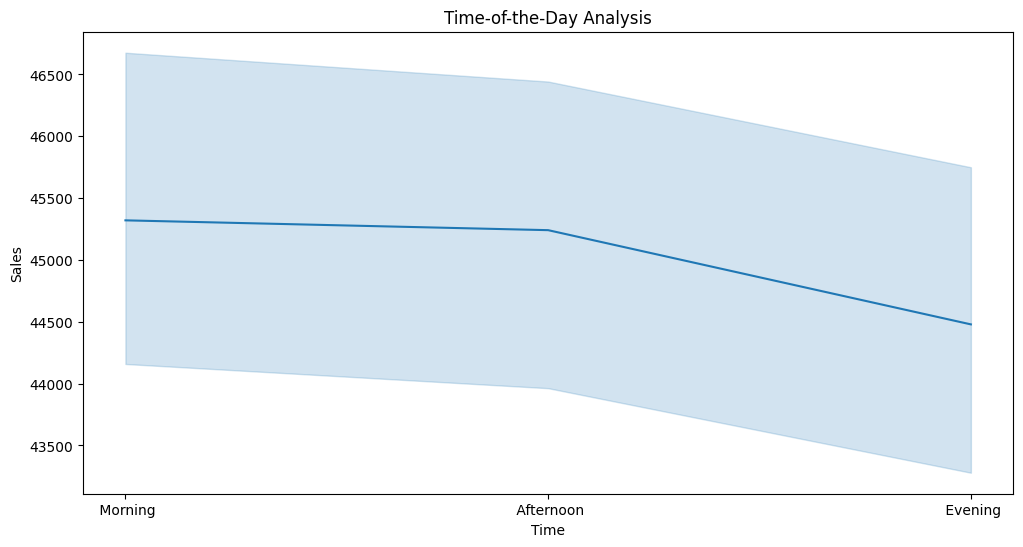

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Time-of-the-Day Analysis')
plt.show()

C:\Users\fabia\OneDrive\Projects\IIT-Applied-DS\.venv\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


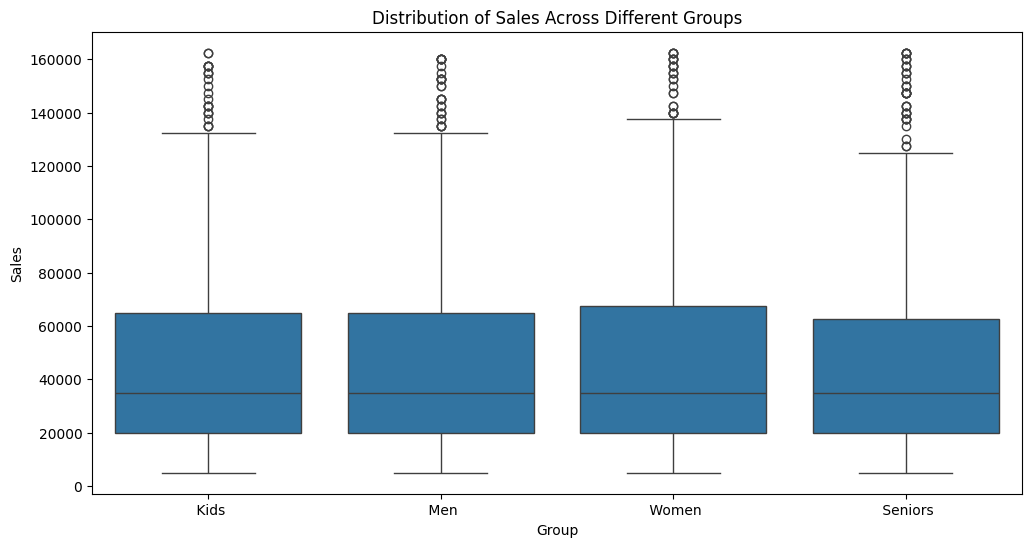

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Sales', data=df)
plt.title('Distribution of Sales Across Different Groups')
plt.show()

## Recommendations:

##### Seaborn is recommended because it is built on top of Matplotlib.
##### It provides a high-level interface for statistical data visualization.
##### It works well with Pandas DataFrames, making it suitable for data analysis tasks.

## Visualization Recommendations:
##### Bar plots are effective for comparing sales across different states and groups.
##### Line plots are useful for observing trends and patterns over time.
##### The use of color (hue) in bar plots helps differentiate between different groups or states.

### Thank You

### Fabian Felix